# Linear Regression 구현 해보기

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

tf.random.set_seed(777)

### 가상 데이터셋

In [12]:
W_true = 3.0
B_true = 2.0

X = tf.random.normal((500, 1))
noise = tf.random.normal((500, 1))

y = X * W_true + B_true + noise

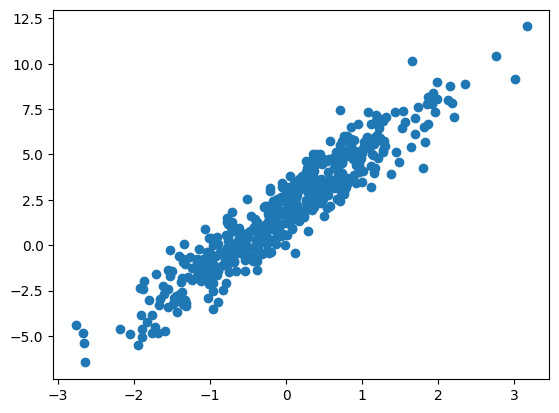

In [13]:
plt.scatter(X,y)
plt.show()

In [14]:
w = tf.Variable(5.)
b = tf.Variable(0.)

In [15]:
lr = 0.03

In [16]:
w_records = []
b_records = []
loss_records = []

for epoch in range(100):
    with tf.GradientTape() as tape:
        y_hat = X * w + b
        loss = tf.reduce_mean(tf.square(y - y_hat))
    w_records.append(w.numpy())
    b_records.append(b.numpy())
    
    loss_records.append(loss.numpy())
    
    dw, db = tape.gradient(loss, [w, b])
    
    w.assign_sub(lr * dw)
    b.assign_sub(lr * db)

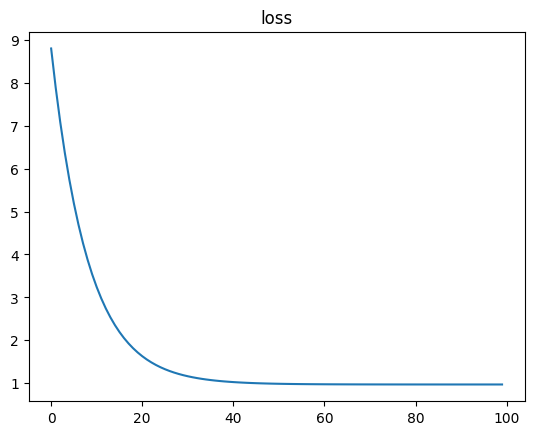

In [18]:
plt.plot(loss_records)
plt.title('loss')
plt.show()

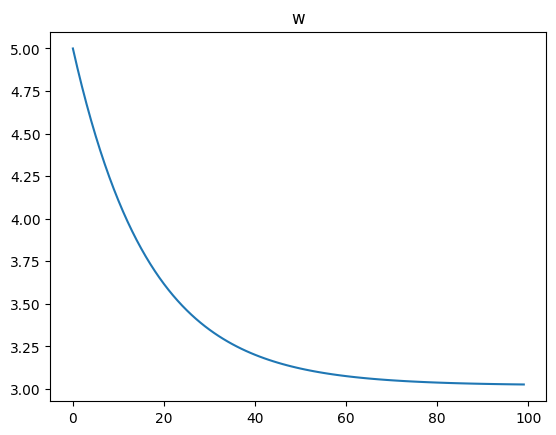

In [19]:
plt.plot(w_records)
plt.title('w')
plt.show()

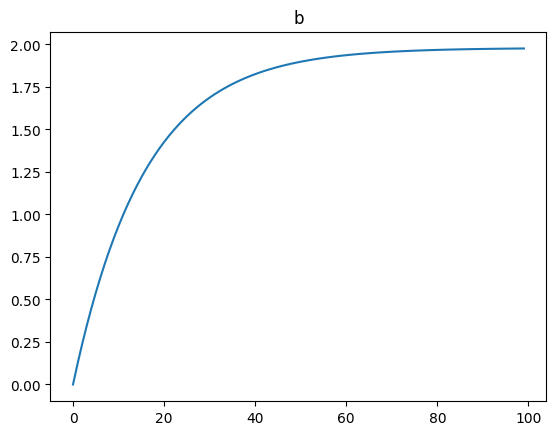

In [20]:
plt.plot(b_records)
plt.title('b')
plt.show()

## Dataset 당뇨병 진행도 예측하기

In [22]:
from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np

diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns = diabetes.feature_names, dtype=np.float32)
df['const'] = np.ones(df.shape[0])
df.tail(3)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,const
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,1.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,1.0
441,-0.045472,-0.044642,-0.073030,-0.081413,0.083740,0.027809,0.173816,-0.039493,-0.004222,0.003064,1.0


In [25]:
diabetes.target.shape

(442,)

In [26]:
X = df
y = np.expand_dims(diabetes.target, axis=1)

In [27]:
X.shape

(442, 11)

In [29]:
XT = tf.transpose(X)

w = tf.matmul(tf.matmul(tf.linalg.inv(tf.matmul(XT, X)), XT),y)

In [30]:
y_pred = tf.matmul(X,w)

In [31]:
y

array([[151.],
       [ 75.],
       [141.],
       [206.],
       [135.],
       [ 97.],
       [138.],
       [ 63.],
       [110.],
       [310.],
       [101.],
       [ 69.],
       [179.],
       [185.],
       [118.],
       [171.],
       [166.],
       [144.],
       [ 97.],
       [168.],
       [ 68.],
       [ 49.],
       [ 68.],
       [245.],
       [184.],
       [202.],
       [137.],
       [ 85.],
       [131.],
       [283.],
       [129.],
       [ 59.],
       [341.],
       [ 87.],
       [ 65.],
       [102.],
       [265.],
       [276.],
       [252.],
       [ 90.],
       [100.],
       [ 55.],
       [ 61.],
       [ 92.],
       [259.],
       [ 53.],
       [190.],
       [142.],
       [ 75.],
       [142.],
       [155.],
       [225.],
       [ 59.],
       [104.],
       [182.],
       [128.],
       [ 52.],
       [ 37.],
       [170.],
       [170.],
       [ 61.],
       [144.],
       [ 52.],
       [128.],
       [ 71.],
       [163.],
       [15

In [32]:
y_pred

<tf.Tensor: shape=(442, 1), dtype=float64, numpy=
array([[206.11667747],
       [ 68.07103311],
       [176.8827902 ],
       [166.91445692],
       [128.4622584 ],
       [106.3519149 ],
       [ 73.89134423],
       [118.8542283 ],
       [158.80889671],
       [213.58462208],
       [ 97.07481353],
       [ 95.10108416],
       [115.06915913],
       [164.67656979],
       [103.07814212],
       [177.17487928],
       [211.75709334],
       [182.84134847],
       [148.00326751],
       [124.01754101],
       [120.33362136],
       [ 85.80068976],
       [113.11345744],
       [252.45225922],
       [165.48779213],
       [147.71997587],
       [ 97.12871477],
       [179.09358229],
       [129.05345735],
       [184.78113935],
       [158.71516855],
       [ 69.47575835],
       [261.50385385],
       [112.82234669],
       [ 78.37318193],
       [ 87.66360874],
       [207.92114621],
       [157.87642015],
       [240.84708263],
       [136.93257462],
       [153.48044629],
       

In [33]:
print("예측한 진행도 : ", y_pred[0].numpy(), "실제 진행도 : ", y[0])

예측한 진행도 :  [206.11667747] 실제 진행도 :  [151.]


### SGD방식

In [47]:
lr = 0.03
num_iter = 100

-----------

In [48]:
w_init = tf.random.normal((X.shape[-1],1), dtype=tf.float64)
w = tf.Variable(w_init)

In [49]:
X.dtypes

age      float32
sex      float32
bmi      float32
bp       float32
s1       float32
s2       float32
s3       float32
s4       float32
s5       float32
s6       float32
const    float64
dtype: object

In [52]:
for i in range(num_iter):
    with tf.GradientTape() as tape:
        y_hat = tf.matmul(X, w)
        loss = tf.reduce_mean((y - y_hat)**2)
        
    dw = tape.gradient(loss,w)
    w.assign_sub(lr * dw)

In [53]:
print("예측한 진행도 : ", y_hat[0].numpy(), "실제 진행도 : ", y[0])
print("예측한 진행도 : ", y_hat[19].numpy(), "실제 진행도 : ", y[19])
print("예측한 진행도 : ", y_hat[31].numpy(), "실제 진행도 : ", y[31])

예측한 진행도 :  [153.11255297] 실제 진행도 :  [151.]
예측한 진행도 :  [149.86502604] 실제 진행도 :  [168.]
예측한 진행도 :  [147.77090565] 실제 진행도 :  [59.]
